<a href="https://colab.research.google.com/github/vamshitn/Samsung-innovation-campus/blob/main/RNN%2CLSTM%2CGRU_on_Humor(joke).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [41]:
# Sample humorous text
text = """Why dont skeletons fight each other

Because they dont have the gut
"""

In [42]:
len(text)

68

In [43]:
# Tokenize the text
tokenizer = Tokenizer(char_level=True)


In [44]:
tokenizer.fit_on_texts([text])

In [45]:
sequences = tokenizer.texts_to_sequences([text])[0]

In [46]:
len(sequences)

68

In [47]:
# Prepare input-output pairs
sequence_length = 5

X = []

y = []

for i in range(len(sequences) - sequence_length):
    X.append(sequences[i:i+sequence_length])
    y.append(sequences[i+sequence_length])

In [48]:
# X,y

In [49]:
X = np.array(X)

y = keras.utils.to_categorical(y,
                               num_classes=len(tokenizer.word_index) + 1)

RNN Model

In [50]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding

rnn_model = Sequential()

rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=50,
                        input_length=sequence_length))

rnn_model.add(SimpleRNN(50))

rnn_model.add(Dense(len(tokenizer.word_index) + 1,
                    activation='softmax'))
#############################################################
rnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam')
#############################################################
rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Model

In [51]:
from keras.layers import LSTM

lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=50,
                         input_length=sequence_length))

lstm_model.add(LSTM(50))

lstm_model.add(Dense(len(tokenizer.word_index) + 1,
                     activation='softmax'))
###################################################
lstm_model.compile(loss='categorical_crossentropy',
                   optimizer='adam')
#################################################
lstm_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

GRU Model

In [52]:
from keras.layers import GRU

gru_model = Sequential()

gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=50,
                        input_length=sequence_length))

gru_model.add(GRU(50))

gru_model.add(Dense(len(tokenizer.word_index) + 1,
                    activation='softmax'))
##########################################################
gru_model.compile(loss='categorical_crossentropy',
                  optimizer='adam')
#################################################
gru_model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the Models

In [55]:
# Train RNN model
rnn_model.fit(X, y, epochs=100, verbose=1)
######################################################
# Train LSTM model
lstm_model.fit(X, y, epochs=100, verbose=1)
######################################################
# Train GRU model
gru_model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1613
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.1252
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0943 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.0501 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.0218 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.9789 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9346
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.8832 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.8407 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.7894
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.7184
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.6633
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.6063 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.5188 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.4450
Epoch 16/10

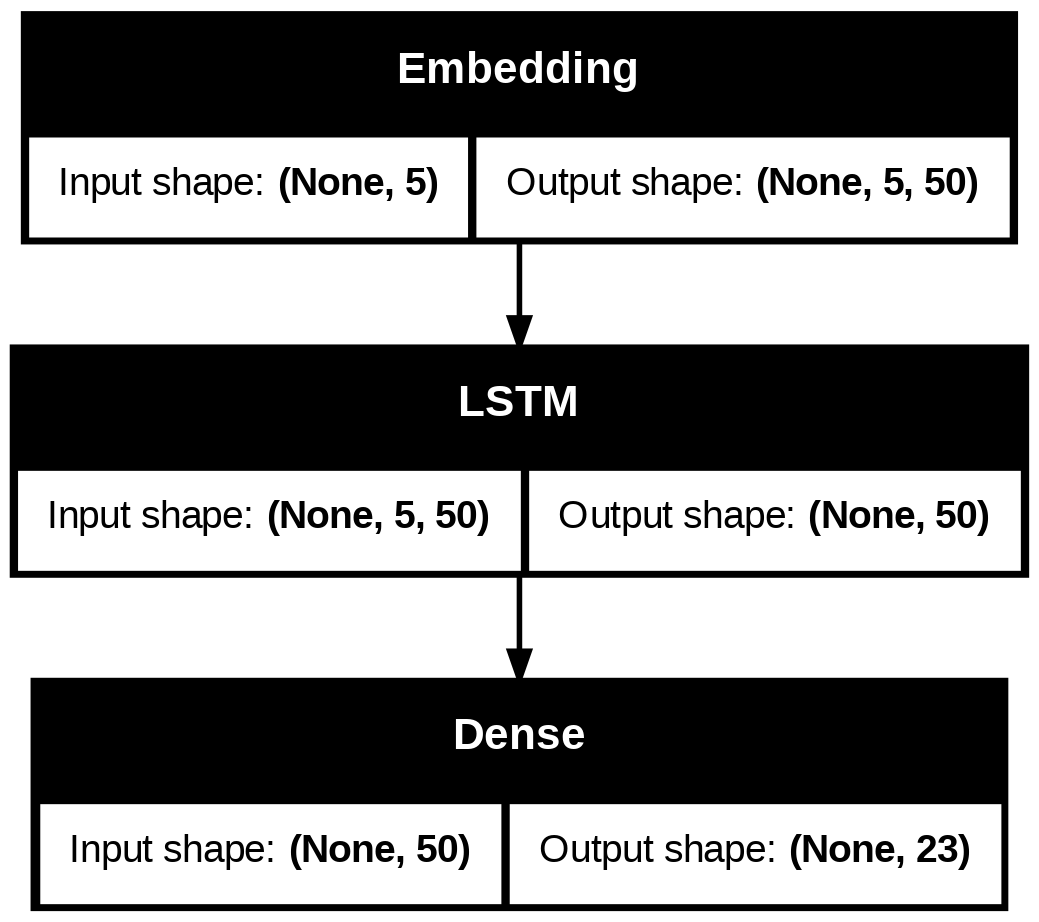

In [56]:
from tensorflow import keras
keras.utils.plot_model(lstm_model, show_shapes=True)

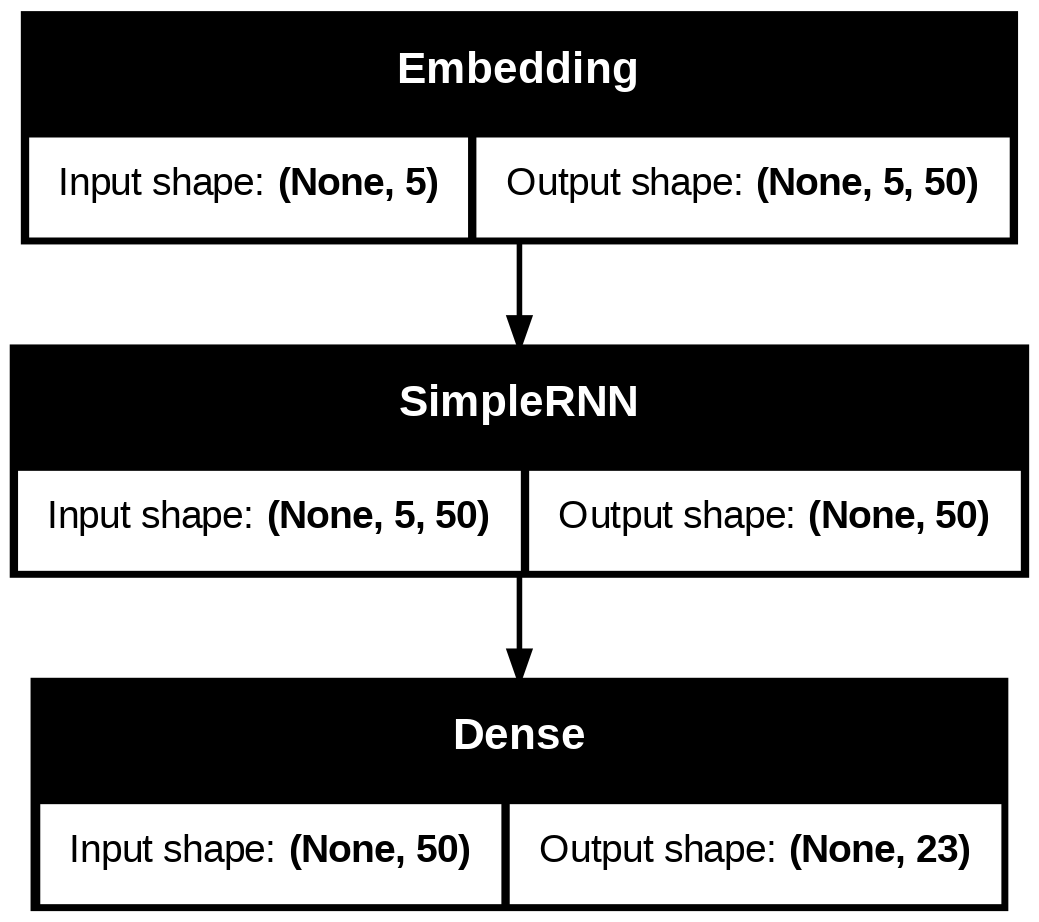

In [57]:
from tensorflow import keras
keras.utils.plot_model(rnn_model, show_shapes=True)

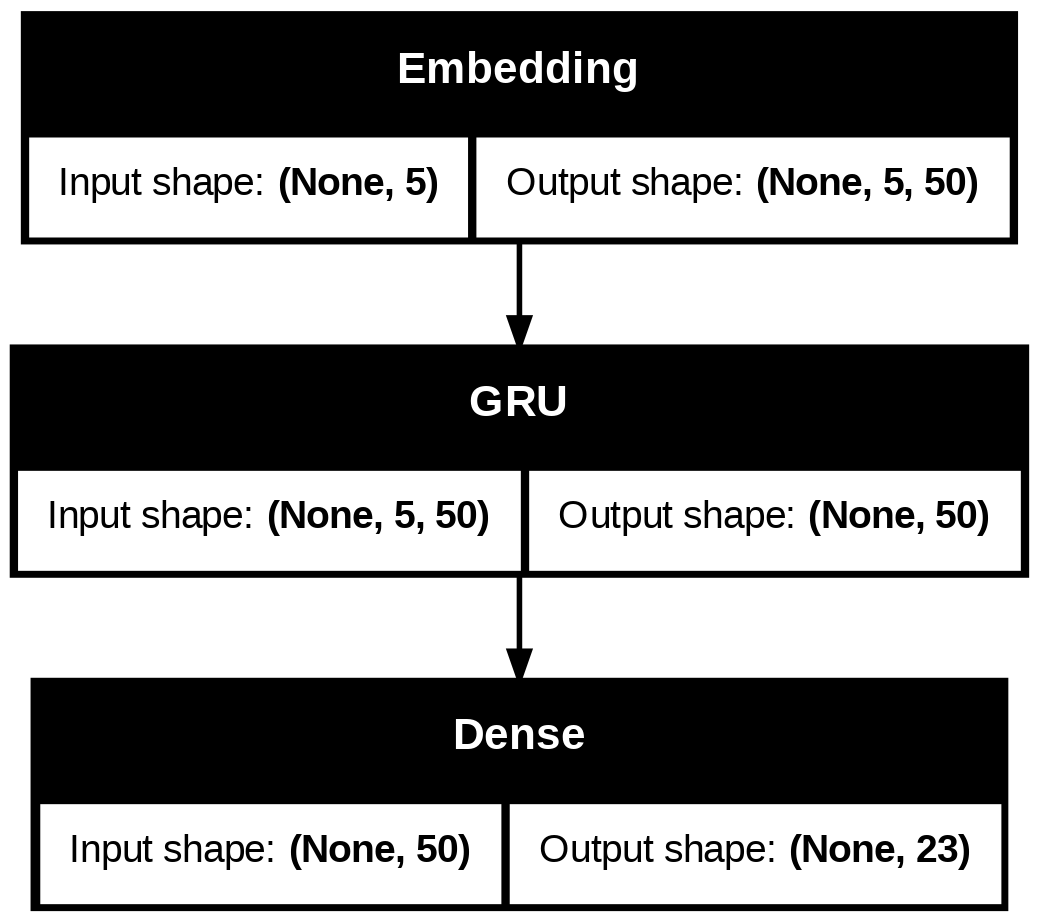

In [58]:
from tensorflow import keras
keras.utils.plot_model(gru_model, show_shapes=True)

Generating & Analysing Humor

In [59]:
def generate_text(model, tokenizer, seed_text, num_chars):
    for _ in range(num_chars):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],
                                   maxlen=sequence_length,
                                   padding='pre')
        predicted = model.predict(token_list,
                                  verbose=0)
        predicted_char = tokenizer.index_word[np.argmax(predicted)]
        seed_text += predicted_char
    return seed_text


In [61]:
seed_text = " joke......."

print("RNN:", generate_text(rnn_model, tokenizer, seed_text, 50))
print("LSTM:", generate_text(lstm_model, tokenizer, seed_text, 50))
print("GRU:", generate_text(gru_model, tokenizer, seed_text, 50))


RNN:  joke....... g
t
eaahcother

because the gut
ra
facht thel don
LSTM:  joke.......  tthge

because the gut




eeauuootsskeeetons ke
GRU:  joke....... the gut
eecause the gut
eecause the gut
eecause t
